In [5]:
import matplotlib.pyplot as plt
import numpy as np
from ruptures import Dynp, Pelt

from src import CPOP

Iterations 100/100 : 438 taus stored


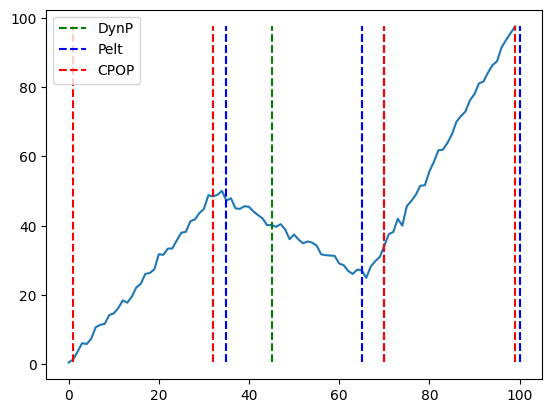

In [6]:
n = 100
sigma = 1

# create a pice-wise linear signal
phis = [0, 50, 25, 100]
taus = [0, n // 3, 2 * n // 3, n]

signal = np.zeros(n)
for i in range(len(taus) - 1):
    for t in range(taus[i], taus[i + 1]):
        signal[t] = phis[i] + (phis[i + 1] - phis[i]) / (taus[i + 1] - taus[i]) * (
            t - taus[i]
        )

np.random.seed(42)
signal += np.random.normal(loc=0, scale=sigma, size=n)


changepoints_cpop = CPOP(signal, 20 * np.log(n), sigma=sigma, verbose=True)
changepoints_dynp = Dynp(model="clinear").fit_predict(signal, n_bkps=len(phis))
changepoints_pelt = Pelt(model="clinear").fit_predict(signal, pen=400)

plt.plot(signal)
plt.vlines(
    changepoints_dynp,
    ymin=np.min(signal),
    ymax=np.max(signal),
    color="g",
    linestyle="--",
    label="DynP",
)
plt.vlines(
    changepoints_pelt,
    ymin=np.min(signal),
    ymax=np.max(signal),
    color="b",
    linestyle="--",
    label="Pelt",
)
plt.vlines(
    changepoints_cpop,
    ymin=np.min(signal),
    ymax=np.max(signal),
    color="r",
    linestyle="--",
    label="CPOP",
)

plt.legend()
plt.show()